In [98]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [100]:
# Data: 10 samples, 2 features each
x = np.array([[2104, 3], 
              [1600, 3], 
              [2400, 3], 
              [1416, 2], 
              [3000, 4], 
              [1985, 4], 
              [1534, 3], 
              [1427, 3], 
              [1380, 3], 
              [1494, 3]])
# Target: 10 samples, corresponding to the output
y = np.array([[1], [1], [1], [0], [0], [1], [0], [1], [1], [1]])

In [101]:
# Normalize the input data
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
x_normalized = (x - x_min) / (x_max - x_min)

# Initialize weights and biases
input_neurons = 2
output_neurons = 1

weights = np.ones((input_neurons, output_neurons))
bias = np.zeros((1, output_neurons))   
learning_rate = 0.1
epochs = 1000

In [102]:
# Training loop
losses = []

for epoch in range(epochs):
    # Forward pass
    z = np.dot(x_normalized, weights) + bias
    y_pred = sigmoid(z)

    # Compute loss
    loss = mse(y, y_pred)
    losses.append(loss)

    # Backward pass (gradient descent)
    error = y_pred - y
    d_loss = error * sigmoid_derivative(y_pred)

    # Update weights and bias
    weights -= learning_rate * np.dot(x_normalized.T, d_loss)  / x.shape[0]
    bias -= learning_rate * np.sum(d_loss)  / x.shape[0]

    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 0.21556761658369497
Epoch 50, Loss: 0.2140732865632034
Epoch 100, Loss: 0.21311032606806557
Epoch 150, Loss: 0.21244563126604263
Epoch 200, Loss: 0.21195340015010275
Epoch 250, Loss: 0.2115634870949227
Epoch 300, Loss: 0.2112357049794243
Epoch 350, Loss: 0.21094651364640357
Epoch 400, Loss: 0.2106818730658972
Epoch 450, Loss: 0.21043328556589258
Epoch 500, Loss: 0.2101955456784194
Epoch 550, Loss: 0.2099654323009333
Epoch 600, Loss: 0.20974093450985237
Epoch 650, Loss: 0.20952078632594864
Epoch 700, Loss: 0.20930418369068654
Epoch 750, Loss: 0.20909061057745987
Epoch 800, Loss: 0.20887973130676038
Epoch 850, Loss: 0.20867132344227263
Epoch 900, Loss: 0.20846523577192483
Epoch 950, Loss: 0.20826136189974895


In [103]:
# Print the updated weights and bias
print("Updated weights:", weights)
print("Updated bias:", bias)

Updated weights: [[0.69787352]
 [1.42511343]]
Updated bias: [[0.10893509]]


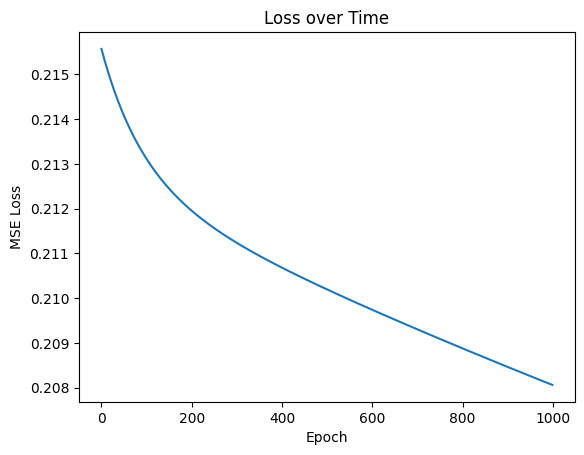

In [104]:
# Plot the loss over time
plt.plot(losses)
plt.title("Loss over Time")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [105]:
def normalize_data(new_property, x_min, x_max):
    return (new_property - x_min) / (x_max - x_min)

def predict_classification(normalized_property, weights, bias):
    return sigmoid(np.dot(normalized_property, weights) + bias)

def classify_prediction(y_pred):
    return "Good" if y_pred > 0.5 else "Bad"


In [106]:
# Test with new data (Area, Bathrooms)
property_1 = np.array([[1500, 1]])
property_2 = np.array([[2000, 2]])

# Normalize the new data
temp_property_1 = normalize_data(property_1, x_min, x_max)
temp_property_2 = normalize_data(property_2, x_min, x_max)

# Predict the classifications
yp_property_1 = predict_classification(temp_property_1, weights, bias)
yp_property_2 = predict_classification(temp_property_2, weights, bias)

# Print the classification results for new properties
print("Property 1 (Area, Bathrooms):", property_1[0])
print("Property 1 Classification:", classify_prediction(yp_property_1), yp_property_1)

print("Property 2 (Area, Bathrooms):", property_2[0])
print("Property 2 Classification:", classify_prediction(yp_property_2), yp_property_2)

Property 1 (Area, Bathrooms): [1500    1]
Property 1 Classification: Bad [[0.36541738]]
Property 2 (Area, Bathrooms): [2000    2]
Property 2 Classification: Good [[0.59291342]]
